# Задание 10
Использовать явную схему для уравнения теплопроводности. Построить график решения.

## Теория

### Уравнение теплопроводности

Рассмотрим изолированный брусок длины $L$. Уравнение теплопроводности описывает температуру $u(x,t)$ в точке $x$ в момент времени $t$ имеет вид:
$$ku_{xx}(x,t)=\sigma\rho u_t(x,t),~0<x<L,~0<t<\infty.$$
Начальное распределение температуры:
$$u(x,0)=f(x),$$
граничные значения на концах бруса:
$$u(0,t)=c_1,~u(L,t)=c_2.$$
$k$ - коэффициент теплопроводности, $\sigma$ - удельная теплоемкость, $\rho$ - плотность бруса.

В нашем случае переобозначим константы и будем рассматривать ограниченное уравнение:
$$u_t(x,t) = c^2u_{xx}(x,t),~0\leq x<a,~0<t<b,$$
$$u(x,0)=f(x),$$
$$u(0,t)=g_1(t) = c_1,~u(a,t)=g_2(t) = c_2.$$

### Разностная схема

Выписывая производные в разностном виде, получим:
$$u_t(x,t)=\frac{u(x,t+k)-u(x,t)}{k},$$
$$u_{xx}(x,t)=\frac{u(x-h,t)-2u(x,t)+u(x+h,t)}{h^2}$$
После подстановки и переобозначений получим:
$$\frac{u_{i,j+1}-u_{i,j}}{k}=c^2\frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h^2}$$
(первый индекс отвечает за шаг в пространстве, второй - шаг по времени)

После замены $r=c^2k/h^2$ и перестановки получим:
$$u_{i,j+1}=(1-2r)u_{i,j}+r(u_{i-1,j}+u_{i+1,j})$$

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2023)

Для рассмотрения возьмем следующую задачу:
$$u_t(x,t)=u_{xx}(x,t),~0<x<1,~0<t<0.2,$$
$$u(x,0)=f(x)=4x-4x^2,$$
$$u(0,t)=g_1(t)=0,~u(1,t)=g_2(t)=0$$

In [2]:
def f(x):
    return 4*x-4*x**2
def g_1(t):
    return t*0
def g_2(t):
    return t*0

In [3]:
num_dots_x = 20
num_dots_t = 200
x_grid = np.linspace(0,1,num_dots_x)
t_grid = np.linspace(0,0.2,num_dots_t)
u_values = np.zeros((x_grid.shape[0],t_grid.shape[0]))

h = x_grid[1] - x_grid[0]
k = t_grid[1] - t_grid[0]

In [4]:
c = 1
r = k/h**2
print(k, (h**2)/(2*c**2))
print(k <= (h**2)/(2*c**2))

0.0010050251256281408 0.0013850415512465372
True


In [5]:
u_values[:, 0] = f(x_grid)
u_values[0, :] = g_1(t_grid)
u_values[-1, :] = g_2(t_grid)

In [6]:
from mpl_toolkits.mplot3d import axes3d

X, Y = np.meshgrid(x_grid, t_grid)

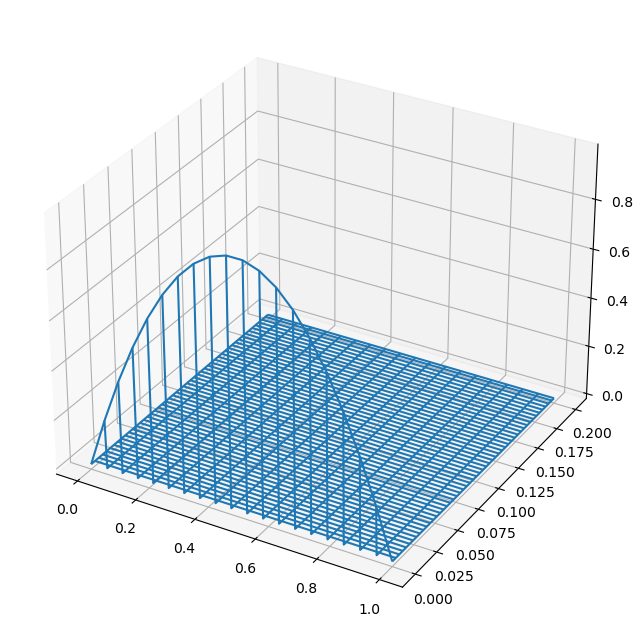

In [7]:
ax = plt.figure(figsize=(10,8)).add_subplot(projection='3d')

ax.plot_wireframe(X, Y, u_values.T)

plt.show()

In [8]:
for j in range(1, num_dots_t - 1):
    for i in range(1, num_dots_x - 1):
        u_values[i, j] = (1-2*r)*u_values[i, j-1] + r*(u_values[i-1, j-1] + u_values[i+1, j-1])

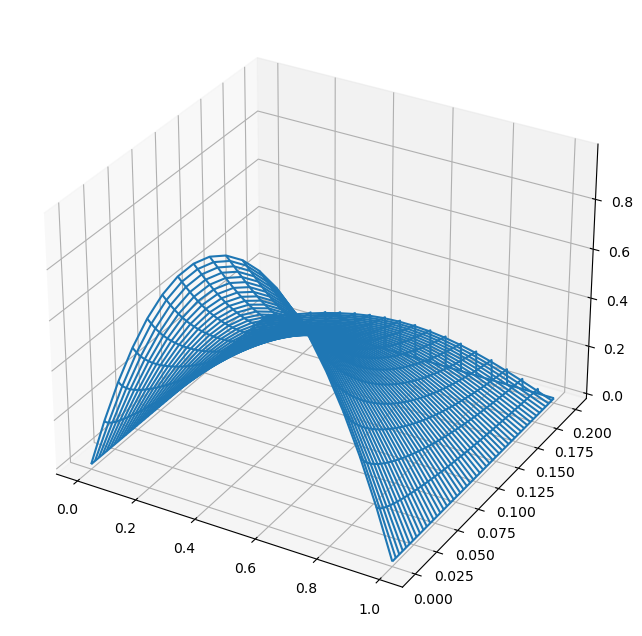

In [9]:
ax = plt.figure(figsize=(10,8)).add_subplot(projection='3d')

ax.plot_wireframe(X, Y, u_values.T)

plt.show()